In [1]:
from src.ingest import feature_to_city
from src.ingest import make_grid
import matplotlib.pyplot as plt
import geopandas as gpd



In [2]:
make_grid.main("Lyon,France", 1000)

In [2]:
gdf = feature_to_city.main('lyon,france', 'ee-thomasbaptiste45', 2020, 1000, 2154)

In [3]:
gdf

,Albedo,LST,NDVI,id,date,geometry,BuiltSurface,Population,DistToWater,WaterFraction,Elevation,BuildingHeight,LST_anomaly
0,0.084636,15.232280,0.190356,0,2020-02-24,"POLYGON ((838734.667 6516640.458, 838734.667 6...",0.204835,40.263233,125.041322,NaN,235.642857,10.338638,-1.613429
1,0.081949,15.013083,0.170939,1,2020-02-24,"POLYGON ((838734.667 6517640.458, 838734.667 6...",0.307551,71.183822,119.135994,NaN,250.403846,11.163105,-1.832627
2,0.080161,15.428857,0.148768,2,2020-02-24,"POLYGON ((838734.667 6518640.458, 838734.667 6...",0.305088,94.282219,105.497672,NaN,222.950685,15.473365,-1.416853
3,0.090610,17.301326,0.174767,3,2020-02-24,"POLYGON ((838734.667 6521640.458, 838734.667 6...",0.210785,32.208383,98.132059,NaN,261.413223,12.926000,0.455617
4,0.082852,14.990947,0.161294,4,2020-02-24,"POLYGON ((839734.667 6517640.458, 839734.667 6...",0.289835,79.969497,78.155264,NaN,273.365385,13.028461,-1.854763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.094107,20.904884,0.133950,68,2020-09-10,"POLYGON ((847734.667 6514640.458, 847734.667 6...",0.243159,32.729768,38.014292,NaN,185.519231,7.551773,-5.269102
653,0.076744,21.160725,0.121281,69,2020-09-10,"POLYGON ((847734.667 6515640.458, 847734.667 6...",0.101381,27.931631,60.997621,NaN,203.395604,13.874361,-5.013261
654,0.064902,22.386402,0.103995,70,2020-09-10,"POLYGON ((847734.667 6516640.458, 847734.667 6...",0.190104,52.559859,49.053849,NaN,204.695890,12.039822,-3.787584
655,0.063309,25.010516,0.090317,71,2020-09-10,"POLYGON ((847734.667 6517640.458, 847734.667 6...",0.544897,113.843793,37.814041,0.020000,191.909589,17.647449,-1.163470


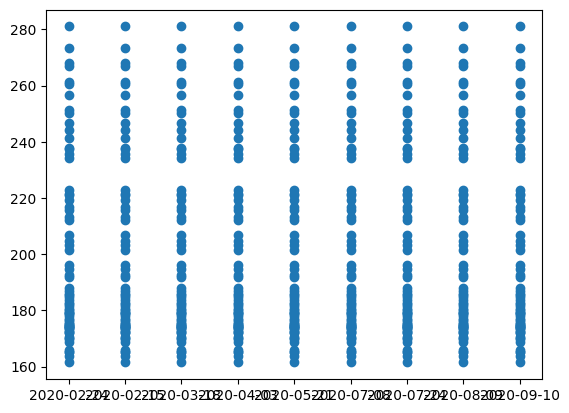

In [4]:
plt.scatter(gdf['date'],gdf["Elevation"])

In [4]:
gdf = feature_to_city.load_city_feature('lyon','2020')

In [8]:
gdf.geometry

0        POLYGON ((837834.667 6518240.458, 837834.667 6...
1        POLYGON ((837834.667 6518340.458, 837834.667 6...
2        POLYGON ((837834.667 6518440.458, 837834.667 6...
3        POLYGON ((837834.667 6518540.458, 837834.667 6...
4        POLYGON ((837934.667 6518140.458, 837934.667 6...
                               ...                        
45679    POLYGON ((847534.667 6518640.458, 847534.667 6...
45680    POLYGON ((847534.667 6518740.458, 847534.667 6...
45681    POLYGON ((847534.667 6518840.458, 847534.667 6...
45682    POLYGON ((847634.667 6518640.458, 847634.667 6...
45683    POLYGON ((847634.667 6518740.458, 847634.667 6...
Name: geometry, Length: 45684, dtype: geometry

TEST

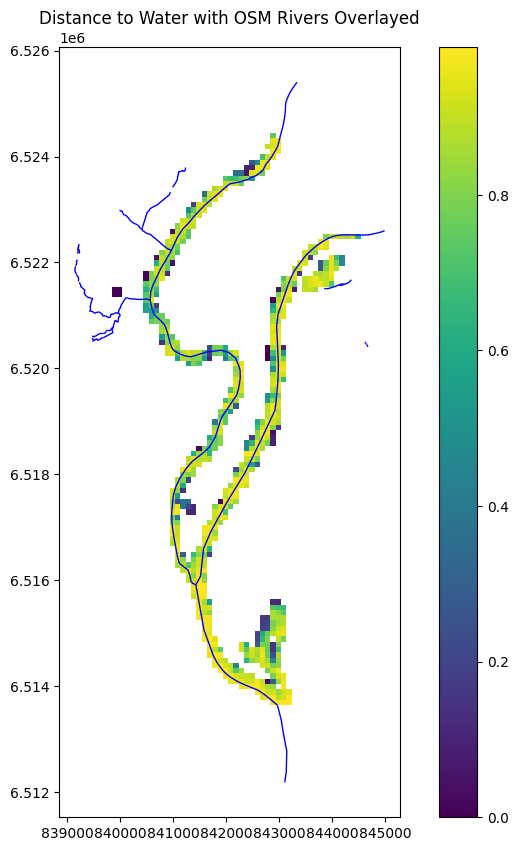

In [7]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Define your place
place_name = "Lyon, France"

# 2. Get river data from OSM
rivers = ox.features_from_place(place_name, tags={'waterway': True})

# 3. Filter for rivers (optional: keep only LineStrings)
rivers = rivers[rivers['waterway'].isin(['river', 'stream'])]
rivers = rivers.to_crs(epsg=2154)
# 4. Load your own grid (e.g., distance to water grid)

# 5. Plot together
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='WaterFraction', ax=ax, legend=True, cmap='viridis', alpha=0.8)
rivers.plot(ax=ax, color='blue', linewidth=1)
plt.title("Distance to Water with OSM Rivers Overlayed")
plt.show()

In [6]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0)
gdf['cluster'] = kmeans.fit_predict(gdf[['LST_anomaly']])

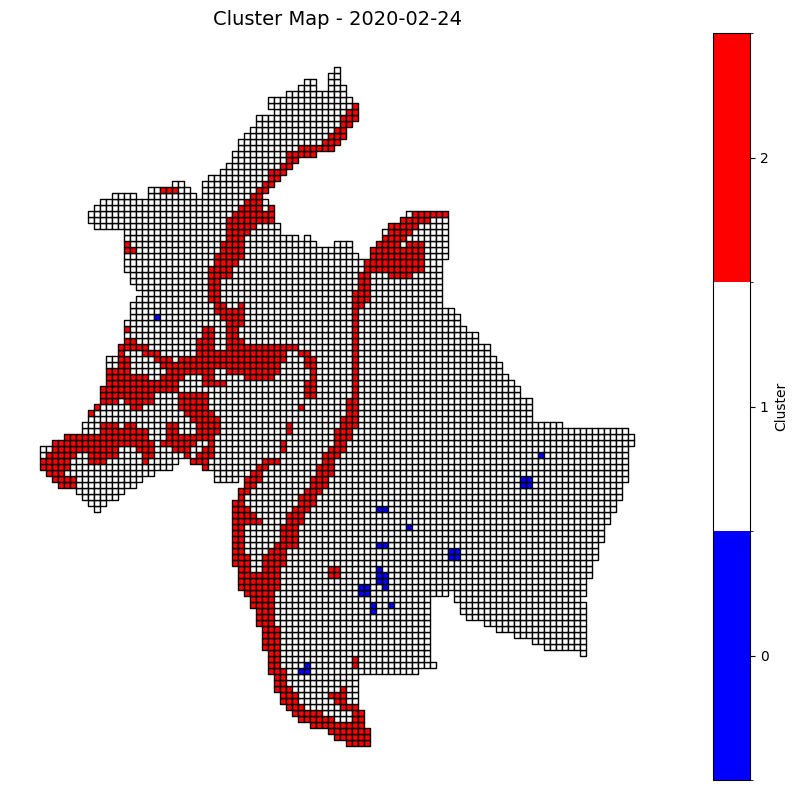

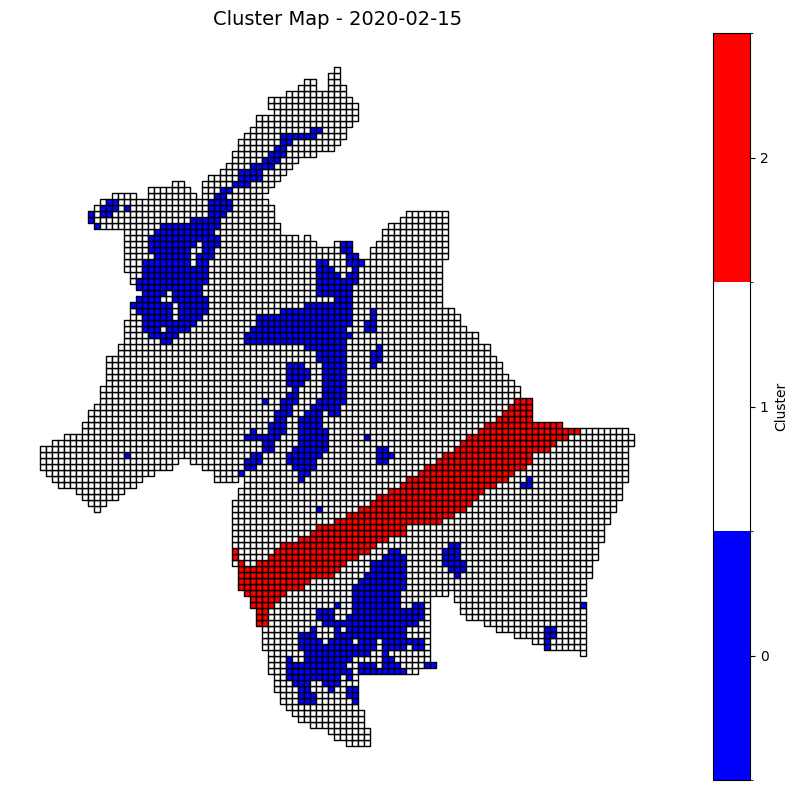

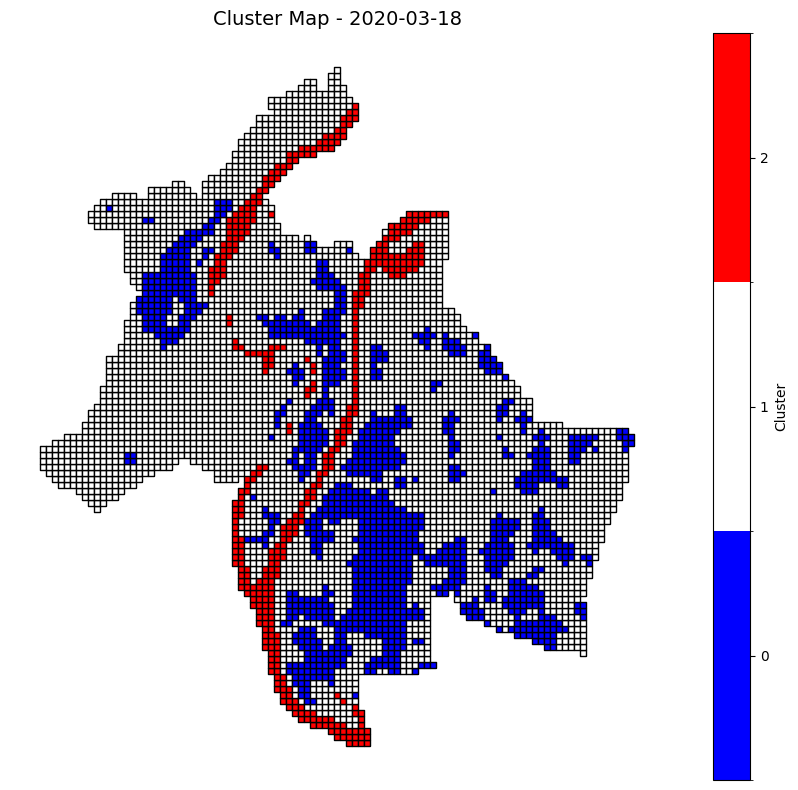

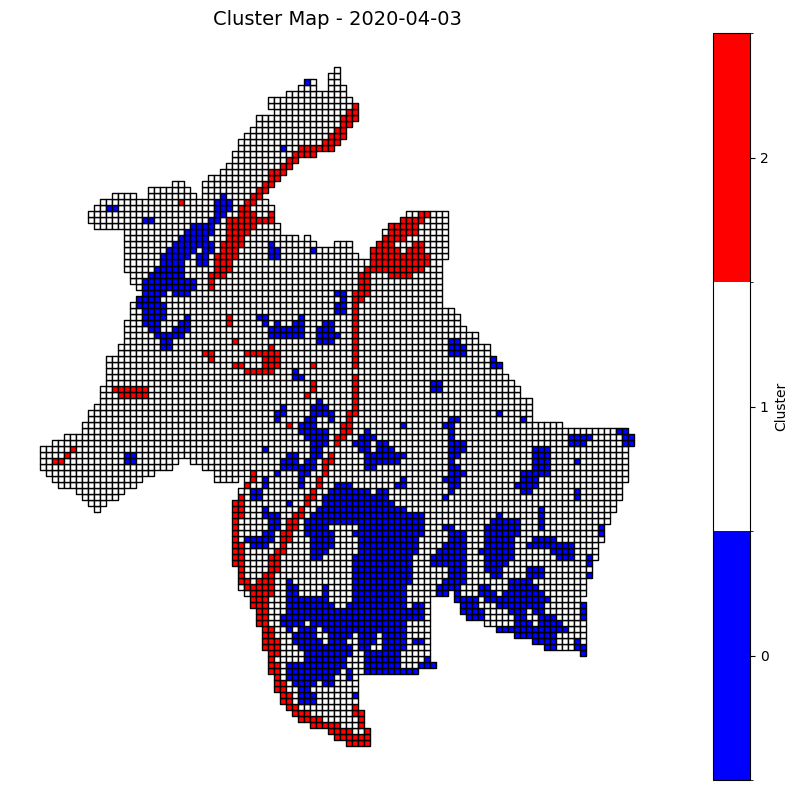

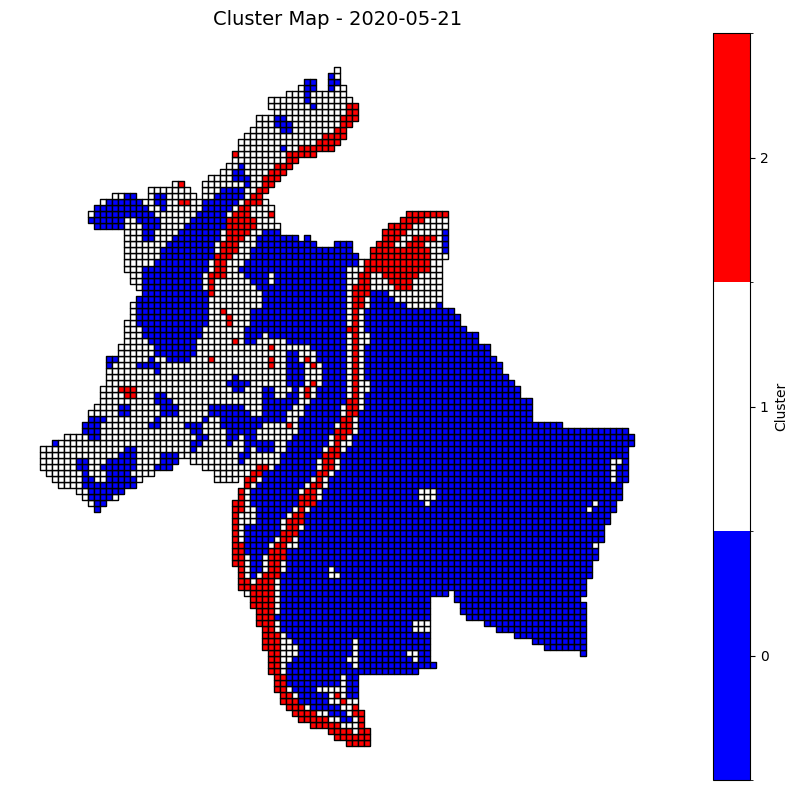

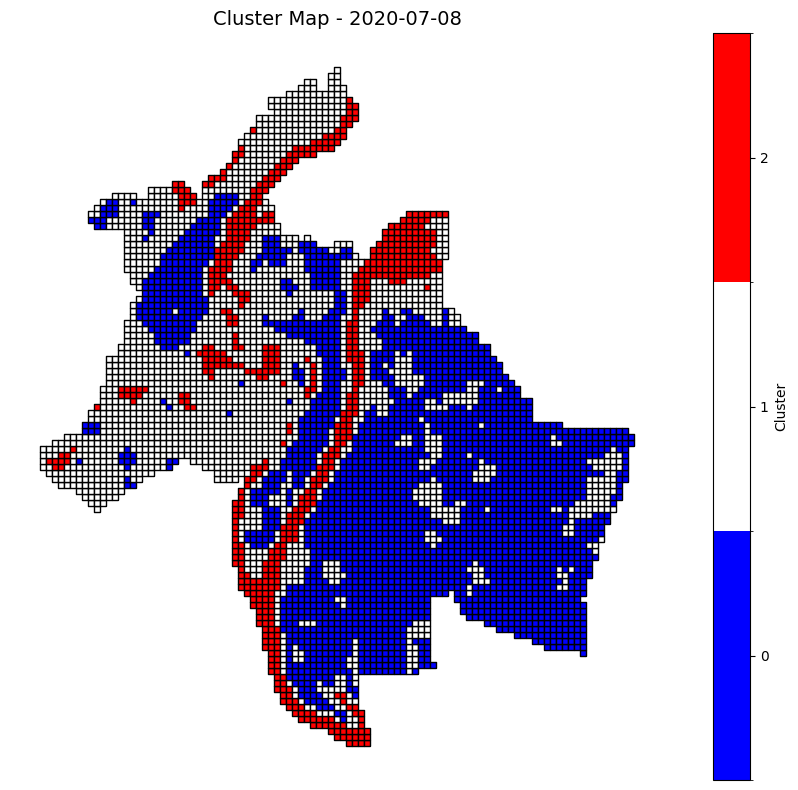

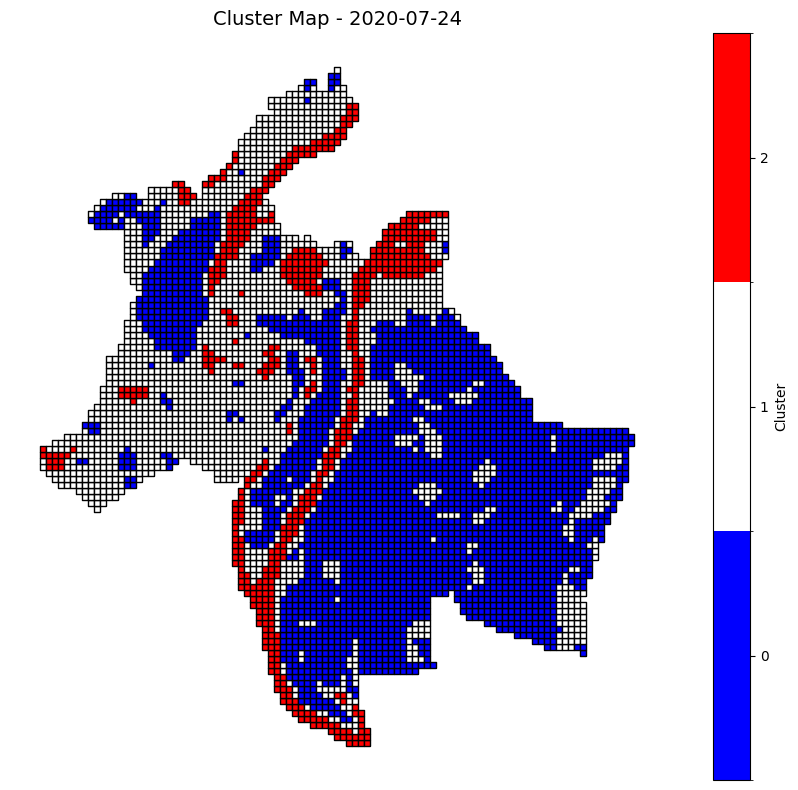

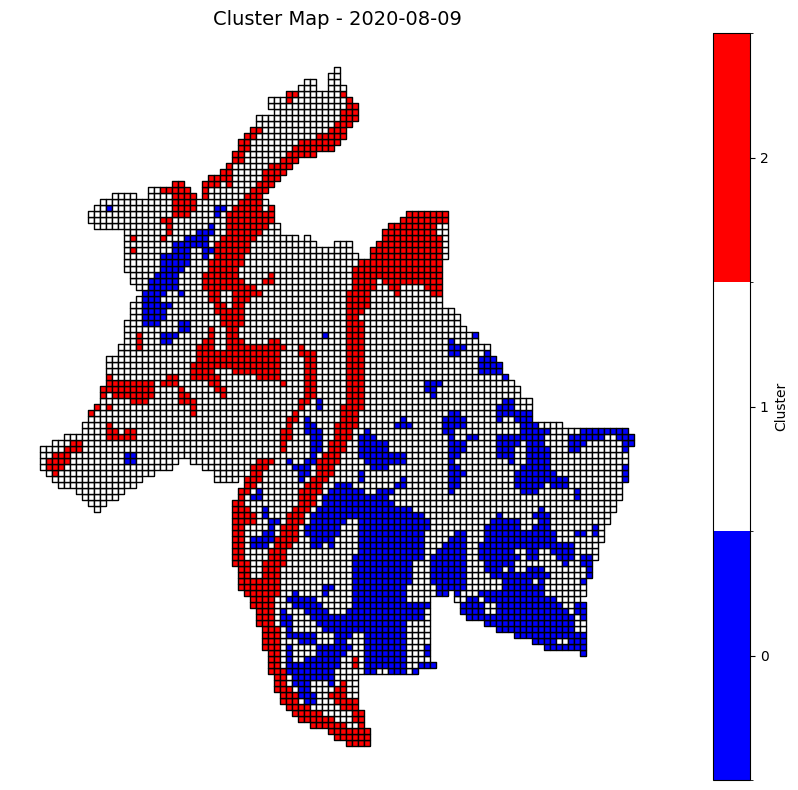

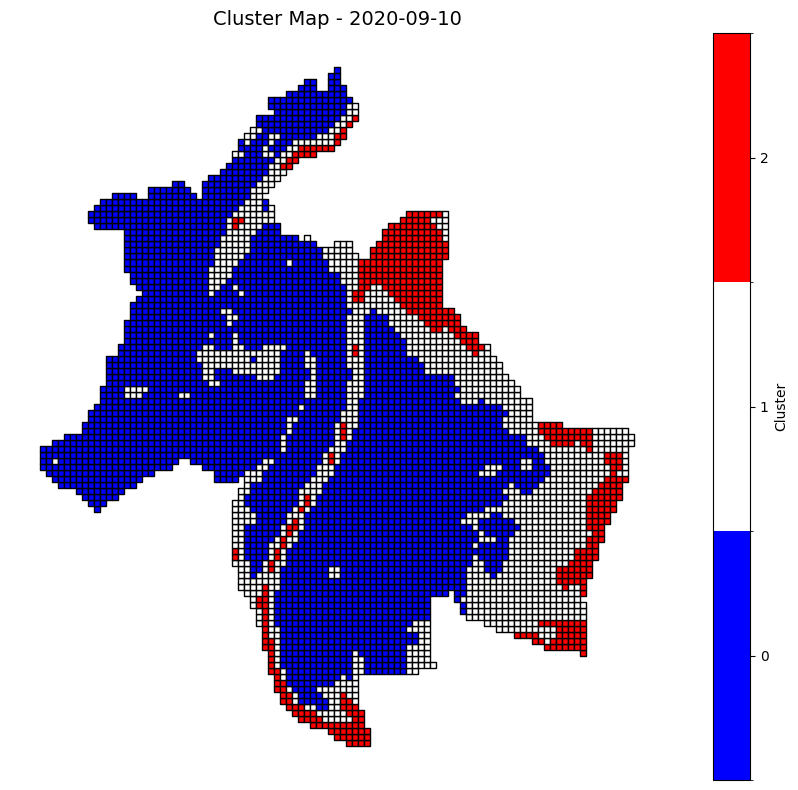

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ensure dates are in datetime format
gdf['date'] = pd.to_datetime(gdf['date'])
unique_dates = gdf['date'].dt.date.unique()

# Optional: define the range of clusters
cluster_labels = sorted(gdf['cluster'].unique())  # e.g., [0, 1, 2]

for date in unique_dates:
    subset = gdf[gdf['date'].dt.date == date]
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Create a discrete colormap
    cmap = plt.get_cmap('bwr', len(cluster_labels))
    norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, len(cluster_labels)+0.5, 1), ncolors=len(cluster_labels))
    
    # Plot and get the colorbar
    plot = subset.plot(column='cluster', ax=ax, cmap=cmap, norm=norm, edgecolor='black')
    
    # Manually create colorbar with set ticks
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []  # dummy array for ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, ticks=cluster_labels)
    cbar.set_label("Cluster")
    
    ax.set_title(f"Cluster Map - {date}", fontsize=14)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [8]:
# # Ensure dates are in datetime format
# gdf['date'] = pd.to_datetime(gdf['date'])
# unique_dates = gdf['date'].dt.date.unique()

# for date in unique_dates:
#     subset = gdf[gdf['date'].dt.date == date]
    
#     fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#     plot = subset.plot(column='NDVI', ax=ax, cmap="viridis", edgecolor='black', legend=True)
#     ax.set_title(f"NDVI - {date}", fontsize=14)

#     plt.tight_layout()
#     plt.show()